In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings

In [2]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder , StandardScaler , RobustScaler , MinMaxScaler , PolynomialFeatures
from sklearn.pipeline import Pipeline , make_pipeline
from datasist.structdata import detect_outliers
from sklearn.impute import SimpleImputer , KNNImputer
from category_encoders import BinaryEncoder
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import GaussianNB , MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , VotingClassifier , BaggingClassifier ,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier 
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score , recall_score , precision_score , f1_score , plot_confusion_matrix , plot_roc_curve,fbeta_score
from sklearn.model_selection import cross_validate , train_test_split , GridSearchCV , StratifiedKFold , RandomizedSearchCV
from sklearn.feature_selection import SequentialFeatureSelector , SelectFromModel
from sklearn.compose import ColumnTransformer
from lazypredict.Supervised import LazyClassifier
from sklearn.preprocessing import FunctionTransformer
from imblearn.pipeline import make_pipeline , pipeline
import joblib
from imblearn.under_sampling import RandomUnderSampler
from tqdm import tqdm

In [3]:
%matplotlib inline
sns.set_theme(context = 'paper' , style = 'whitegrid' ,
              palette = 'hsv' , rc = {'figure.figsize' : (10 , 4)}) 

In [34]:
df = pd.read_csv('Employees Promotion V1.csv')
df.head()

,EmployeeID,Department,Region_Employment,Education Level,Gender,Recruitment Channel,NO_Trainings_LstYear,Age,previous_year_rating,Service Length,Awards,Avg_Training_Score,Is Promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35.00,5.00,8,NO,49.00,NO
1,65141,Operations,region_22,Bachelor's,m,other,1,30.00,5.00,4,NO,60.00,NO
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34.00,3.00,7,NO,50.00,NO
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39.00,1.00,10,NO,50.00,NO
4,48945,Technology,region_26,Bachelor's,m,other,1,45.00,3.00,2,NO,73.00,NO


In [35]:
df.drop(['EmployeeID'] , axis = 1 , inplace = True )

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Department            54603 non-null  object 
 1   Region_Employment     54808 non-null  object 
 2   Education Level       52399 non-null  object 
 3   Gender                54808 non-null  object 
 4   Recruitment Channel   44404 non-null  object 
 5   NO_Trainings_LstYear  54808 non-null  int64  
 6   Age                   54268 non-null  float64
 7   previous_year_rating  50684 non-null  float64
 8   Service Length        54808 non-null  int64  
 9   Awards                54808 non-null  object 
 10  Avg_Training_Score    52248 non-null  float64
 11  Is Promoted           54808 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 5.0+ MB


In [37]:
df.isnull().mean()*100

Department              0.37
Region_Employment       0.00
Education Level         4.40
Gender                  0.00
Recruitment Channel    18.98
NO_Trainings_LstYear    0.00
Age                     0.99
previous_year_rating    7.52
Service Length          0.00
Awards                  0.00
Avg_Training_Score      4.67
Is Promoted             0.00
dtype: float64

In [38]:
df.duplicated().sum()

157

In [39]:
df.drop_duplicates(inplace = True , ignore_index = True)

In [40]:
df['Is Promoted'].value_counts()

NO     49985
YES     4666
Name: Is Promoted, dtype: int64

In [41]:
df[df['Is Promoted'] == 'YES'].isnull().mean()*100

Department              0.41
Region_Employment       0.00
Education Level         2.59
Gender                  0.00
Recruitment Channel    19.20
NO_Trainings_LstYear    0.00
Age                     0.88
previous_year_rating    7.24
Service Length          0.00
Awards                  0.00
Avg_Training_Score      3.77
Is Promoted             0.00
dtype: float64

In [42]:
num_imputer = KNNImputer(n_neighbors=3)

In [43]:
df[df.select_dtypes('number').columns] = num_imputer.fit_transform(df[df.select_dtypes('number').columns])

In [44]:
cat_imputer = SimpleImputer(strategy='most_frequent')

In [45]:
df[df.select_dtypes('object_').columns] = cat_imputer.fit_transform(df[df.select_dtypes('object_').columns])

In [46]:
df.isnull().mean()*100

Department             0.00
Region_Employment      0.00
Education Level        0.00
Gender                 0.00
Recruitment Channel    0.00
NO_Trainings_LstYear   0.00
Age                    0.00
previous_year_rating   0.00
Service Length         0.00
Awards                 0.00
Avg_Training_Score     0.00
Is Promoted            0.00
dtype: float64

In [55]:
df['NO_Trainings_LstYear'] = df['NO_Trainings_LstYear'].apply(lambda x : '1' if x == 1 else '>1')

In [57]:
df['NO_Trainings_LstYear'].unique()

array(['1', '>1'], dtype=object)

<AxesSubplot:xlabel='Is Promoted', ylabel='count'>

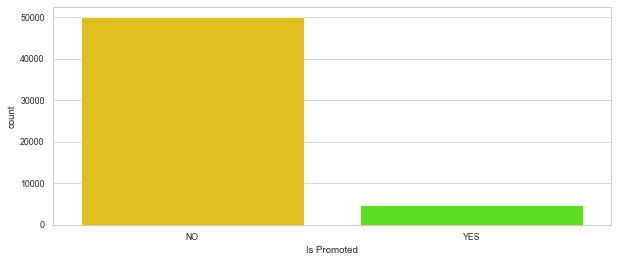

In [59]:
sns.countplot(df['Is Promoted'])

In [60]:
for col in df.select_dtypes('object_').columns:
    display(col , df[col].unique())

'Department'

array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal'], dtype=object)

'Region_Employment'

array(['region_7', 'region_22', 'region_19', 'region_23', 'region_26',
       'region_2', 'region_20', 'region_34', 'region_1', 'region_4',
       'region_29', 'region_31', 'region_15', 'region_14', 'region_11',
       'region_5', 'region_28', 'region_17', 'region_13', 'region_16',
       'region_25', 'region_10', 'region_27', 'region_30', 'region_12',
       'region_21', 'region_8', 'region_32', 'region_6', 'region_33',
       'region_24', 'region_3', 'region_9', 'region_18'], dtype=object)

'Education Level'

array(["Master's & above", "Bachelor's", 'Below Secondary'], dtype=object)

'Gender'

array(['f', 'm'], dtype=object)

'Recruitment Channel'

array(['sourcing', 'other', 'referred'], dtype=object)

'NO_Trainings_LstYear'

array(['1', '>1'], dtype=object)

'Awards'

array(['NO', 'YES'], dtype=object)

'Is Promoted'

array(['NO', 'YES'], dtype=object)

In [61]:
ohe_col = ['Recruitment Channel' , 'Gender' , 'NO_Trainings_LstYear' , 'Awards']
be_col = ['Department' , 'Region_Employment']

In [62]:
df['Education Level'].unique()

array(["Master's & above", "Bachelor's", 'Below Secondary'], dtype=object)

In [64]:
mapper = {"Master's & above" : 3 , "Bachelor's" : 2 , 'Below Secondary' : 1}
joblib.dump(mapper , 'EDU_Mapper.h5')

['EDU_Mapper.h5']

In [65]:
df['Education Level'] = df['Education Level'].map(mapper)

In [66]:
x , y = df[df.columns[:-1]] , df['Is Promoted'].apply(lambda x : 1 if x == 'YES' else 0)

In [67]:
rm = RandomUnderSampler()

In [68]:
x , y = rm.fit_resample(x , y)

<AxesSubplot:xlabel='Is Promoted', ylabel='count'>

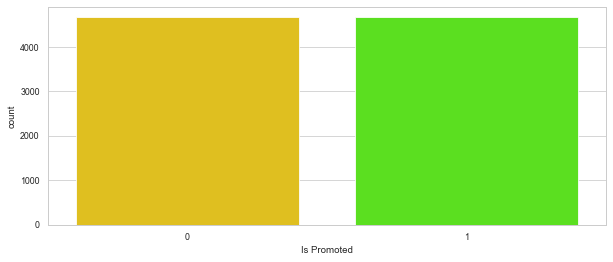

In [69]:
sns.countplot(y)

In [72]:
trans = ColumnTransformer(transformers=[('ohe',OneHotEncoder(sparse=False , drop = 'first'),ohe_col)
                                        , ('be' , BinaryEncoder() , be_col)]
                          , remainder='passthrough')
trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe',
                                 OneHotEncoder(drop='first', sparse=False),
                                 ['Recruitment Channel', 'Gender',
                                  'NO_Trainings_LstYear', 'Awards']),
                                ('be', BinaryEncoder(),
                                 ['Department', 'Region_Employment'])])

In [73]:
models = []
models.append(('DTC' , DecisionTreeClassifier()))
models.append(('RFC' , RandomForestClassifier()))
models.append(('XGB' , XGBClassifier()))

In [74]:
scoring = ['accuracy' , 'recall' , 'f1' , 'precision']

In [76]:
for model in models :
    PL = make_pipeline(trans ,StandardScaler(), model[1])
    scores = cross_validate(estimator=PL , X = x , y = y , cv = StratifiedKFold(n_splits=5) ,
                            scoring=scoring  , return_train_score=True )
    print('-'*60)
    print(model[0])
    print(f'train accuracy : {scores["train_accuracy"].mean()} , test accuracy : {scores["test_accuracy"].mean()}'.title())
    print(f'train recall : {scores["train_recall"].mean()} , test recall : {scores["test_recall"].mean()}'.title())
    print(f'train precision : {scores["train_precision"].mean()} , test precision : {scores["test_precision"].mean()}'.title())
    print(f'train f1_score : {scores["train_f1"].mean()} , test f1_score : {scores["test_f1"].mean()}'.title())

------------------------------------------------------------
DTC
Train Accuracy : 0.9995713759487306 , Test Accuracy : 0.6466999175043959
Train Recall : 0.9991427375377165 , Test Recall : 0.6615954153096892
Train Precision : 1.0 , Test Precision : 0.6425090754220181
Train F1_Score : 0.9995711533534231 , Test F1_Score : 0.651881719527867
------------------------------------------------------------
RFC
Train Accuracy : 0.9995713759487306 , Test Accuracy : 0.7112098723757987
Train Recall : 0.9995713615909093 , Test Recall : 0.6680230703379075
Train Precision : 0.9995714189529753 , Test Precision : 0.7315247060743607
Train F1_Score : 0.9995713615736037 , Test F1_Score : 0.6981793604168924
------------------------------------------------------------
XGB
Train Accuracy : 0.8772503597016454 , Test Accuracy : 0.7085304587892263
Train Recall : 0.8462814778191323 , Test Recall : 0.6686656981347728
Train Precision : 0.9021577663641072 , Test Precision : 0.7268216335419805
Train F1_Score : 0.87331

# `-----------------DecisionTreeClassifier For Tunning-----------------`

In [85]:
DT_params = [
    {
        'decisiontreeclassifier__max_depth' : [4,5,6,7,8,9,10,11,12,15],
        'decisiontreeclassifier__min_samples_leaf' : [1,2,3,4,5,6,7,8,9,10],
        'decisiontreeclassifier__min_samples_split': [2, 5, 10],
        'decisiontreeclassifier__max_leaf_nodes' : [None,10,20,30,40,50,60,70,80,90] 
    }
]

In [86]:
DTC = make_pipeline(trans , DecisionTreeClassifier())

In [95]:
DTC_RanGrid = RandomizedSearchCV(estimator=DTC , param_distributions=DT_params ,
                                 scoring='accuracy' , cv = StratifiedKFold(n_splits=5) ,
                                 return_train_score=True ,verbose=1 , n_iter=10)

In [110]:
DTC_RanGrid.fit(x , y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               OneHotEncoder(drop='first',
                                                                                             sparse=False),
                                                                               ['Recruitment '
                                                                                'Channel',
                                                                                'Gender',
                                                                                'NO_Trainings_LstYear',
                                                                                'Awards']),
                                                                              ('be',
                                                                               BinaryEncoder(),
                                                                               ['Department',
                                                                                'Region_Employ...
                                              DecisionTreeClassifier())]),
                   param_distributions=[{'decisiontreeclassifier__max_depth': [4,
                                                                               5,
                                                                               6,
                                                                               7,
                                                                               8,
                                                                               9,
                                                                               10,
                                                                               11,
                                                                               12,
                                                                               15],
                                         'decisiontreeclassifier__max_leaf_nodes': [None,
                                                                                    10,
                                                                                    20,
                                                                                    30,
                                                                                    40,
                                                                                    50,
                                                                                    60,
                                                                                    70,
                                                                                    80,
                                                                                    90],
                                         'decisiontreeclassifier__min_samples_leaf': [1,
                                                                                      2,
                                                                                      3,
                                                                                      4,
                                                                                      5,
                                                                                      6,
                                                                                      7,
                                                                                      8,
                                                                                      9,
                             

In [117]:
DTC_RanGrid.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Recruitment Channel',
                                                   'Gender',
                                                   'NO_Trainings_LstYear',
                                                   'Awards']),
                                                 ('be', BinaryEncoder(),
                                                  ['Department',
                                                   'Region_Employment'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=11, max_leaf_nodes=60,
                                        min_samples_leaf=6,
                                        min_samples_split=5))])

In [111]:
DTC_RanGrid.best_score_

0.71067385187877

In [112]:
DTC_RanGrid.cv_results_['mean_train_score'].max()

0.7463565286992482

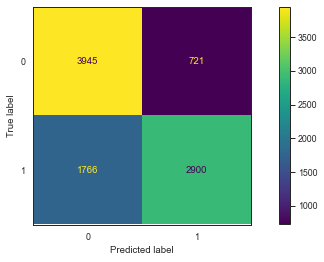

In [113]:
sns.set_style('white')
plot_confusion_matrix(DTC_RanGrid.best_estimator_ , x , y)

In [114]:
recall_score(DTC_RanGrid.best_estimator_.predict(x) , y)

0.8008837337752002

In [115]:
f1_score(DTC_RanGrid.best_estimator_.predict(x) , y)

0.6998913961626645

In [116]:
precision_score(DTC_RanGrid.best_estimator_.predict(x) , y)

0.6215173596228033

# `-----------------RandomForestClassifier For Tunning-----------------`

In [118]:
RF_params = [
    {
        'randomforestclassifier__max_depth': [4,5,6,7,8],
        'randomforestclassifier__min_samples_leaf':[1,2,3,4,5],
        'randomforestclassifier__min_samples_split': [2, 5, 10],
        'randomforestclassifier__n_estimators': list(range(30, 500, 20)),
    }
]

In [119]:
RFC = make_pipeline(trans, RandomForestClassifier())

In [132]:
RF_RanGrid = RandomizedSearchCV(estimator=RFC , param_distributions= RF_params ,
                                 scoring='accuracy' , cv = StratifiedKFold(n_splits=5) ,
                                 return_train_score=True , n_iter=10 , verbose=True )

In [133]:
RF_RanGrid.fit(x , y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               OneHotEncoder(drop='first',
                                                                                             sparse=False),
                                                                               ['Recruitment '
                                                                                'Channel',
                                                                                'Gender',
                                                                                'NO_Trainings_LstYear',
                                                                                'Awards']),
                                                                              ('be',
                                                                               BinaryEncoder(),
                                                                               ['Department',
                                                                                'Region_Employ...
                   param_distributions=[{'randomforestclassifier__max_depth': [4,
                                                                               5,
                                                                               6,
                                                                               7,
                                                                               8],
                                         'randomforestclassifier__min_samples_leaf': [1,
                                                                                      2,
                                                                                      3,
                                                                                      4,
                                                                                      5],
                                         'randomforestclassifier__min_samples_split': [2,
                                                                                       5,
                                                                                       10],
                                         'randomforestclassifier__n_estimators': [30,
                                                                                  50,
                                                                                  70,
                                                                                  90,
                                                                                  110,
                                                                                  130,
                                                                                  150,
                                                                                  170,
                                                                                  190,
                                                                                  210,
                                                                                  230,
                                                                                  250,
                                                                                  270,
                                                                                  290,
                                                                                  310,
                                                                                  330,
                                                                                  350,
         

In [124]:
RF_RanGrid.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Recruitment Channel',
                                                   'Gender',
                                                   'NO_Trainings_LstYear',
                                                   'Awards']),
                                                 ('be', BinaryEncoder(),
                                                  ['Department',
                                                   'Region_Employment'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=8, min_samples_leaf=3,
                                        min_samples_split=5,
                                        n_estimators=450))])

In [125]:
RF_RanGrid.best_score_

0.7112103890497277

In [126]:
RF_RanGrid.cv_results_['mean_train_score'].max()

0.7421237316244447

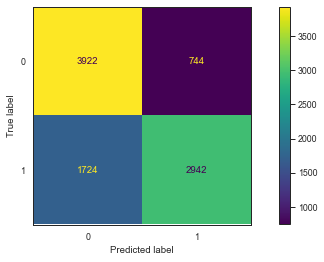

In [139]:
plot_confusion_matrix(RF_RanGrid.best_estimator_ , x , y)

In [138]:
recall_score(RF_RanGrid.best_estimator_.predict(x) , y)

0.7981551817688551

In [129]:
precision_score(RF_RanGrid.best_estimator_.predict(x) , y)

0.6183026146592371

In [130]:
f1_score(RF_RanGrid.best_estimator_.predict(x) , y)

0.701093560145808

# `-----------------XGBClassifier For Tunning-----------------`

In [223]:
XGB_params = [
    {
        'xgbclassifier__max_depth': [4,5,6,7,8],
        'xgbclassifier__n_estimators': list(range(100, 500, 20)),
    }
]

In [224]:
XGB = make_pipeline(trans,RobustScaler(),SelectFromModel(estimator=XGBClassifier()) ,XGBClassifier())

In [225]:
XGB_RanGrid = RandomizedSearchCV(estimator=XGB , param_distributions= XGB_params ,
                                 scoring='accuracy' , cv = StratifiedKFold(n_splits=5) ,
                                 return_train_score=True , n_iter=10 , verbose=True )

In [256]:
XGB_RanGrid.fit(x , y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               OneHotEncoder(drop='first',
                                                                                             sparse=False),
                                                                               ['Recruitment '
                                                                                'Channel',
                                                                                'Gender',
                                                                                'NO_Trainings_LstYear',
                                                                                'Awards']),
                                                                              ('be',
                                                                               BinaryEncoder(),
                                                                               ['Department',
                                                                                'Region_Employ...
                                                            n_estimators=100,
                                                            n_jobs=None,
                                                            num_parallel_tree=None,
                                                            predictor=None,
                                                            random_state=None,
                                                            reg_alpha=None,
                                                            reg_lambda=None, ...))]),
                   param_distributions=[{'xgbclassifier__max_depth': [4, 5, 6,
                                                                      7, 8],
                                         'xgbclassifier__n_estimators': [100,
                                                                         120,
                                                                         140,
                                                                         160,
                                                                         180,
                                                                         200,
                                                                         220,
                                                                         240,
                                                                         260,
                                                                         280,
                                                                         300,
                                                                         320,
                                                                         340,
                                                                         360,
                                                                         380,
                                                                         400,
                                                                         420,
                                                                         440,
                                                                         460,
                                                                         480]}],
                   return_train_score=True, scoring='accuracy', verbose=True)

In [257]:
XGB_RanGrid.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Recruitment Channel',
                                                   'Gender',
                                                   'NO_Trainings_LstYear',
                                                   'Awards']),
                                                 ('be', BinaryEncoder(),
                                                  ['Department',
                                                   'Region_Employment'])])),
                ('robustscaler', RobustScaler()),
                ('selectfrommodel',
                 SelectFromModel(estimator=XGBCla...
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=4, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=380, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=0, reg_alpha=0,
                               reg_lambda=1, ...))])

In [258]:
XGB_RanGrid.best_params_

{'xgbclassifier__n_estimators': 380, 'xgbclassifier__max_depth': 4}

In [259]:
XGB_RanGrid.best_score_

0.7060687945595384

In [260]:
XGB_RanGrid.cv_results_['mean_train_score']

array([0.75216954, 0.75238384, 0.75575929, 0.7549288 , 0.75042818,
       0.7567237 , 0.75632187, 0.74852612, 0.75190165, 0.74635618])

In [261]:
XGB_RanGrid.cv_results_['mean_test_score']

array([0.70103226, 0.69985401, 0.69653208, 0.69846048, 0.70253274,
       0.69546045, 0.69696035, 0.70446108, 0.70103203, 0.70606879])

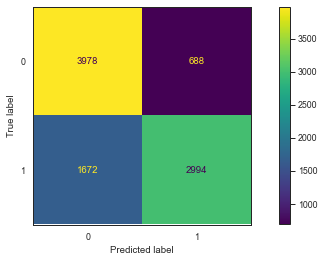

In [262]:
plot_confusion_matrix(XGB_RanGrid.best_estimator_ , x , y)

In [263]:
recall_score(XGB_RanGrid.best_estimator_.predict(x) , y)

0.8131450298750679

In [264]:
precision_score(XGB_RanGrid.best_estimator_.predict(x) , y)

0.6416630947278182

In [265]:
f1_score(XGB_RanGrid.best_estimator_.predict(x) , y)

0.7172975563009103

In [266]:
joblib.dump(XGB_RanGrid.best_estimator_ , 'XGB.h5')

['XGB.h5']